# **Implementing a Multilayer Artificial Neural Network from Scratch**


### **Outline**

- Modeling complex functions with artificial neural networks
    - Single-layer neural network recap
    - Introducing the multilayer neural network architecture
    - Activating a neural network via forward propagation

- Classifying handwritten digits
    - Obtaining the MNIST dataset
    - Implementing a multilayer perceptron
    - Coding the neural network training loop
    - Evaluating the neural network performance

- Training an artificial neural network
    - Computing the loss function
    - Developing your intuition for backpropagation
    - Training neural networks via backpropagation

- About the convergence in neural networks

- A few last words about the neural network implementation

- Summary

In [1]:
from IPython.display import Image
%matplotlib inline

## **Modeling complex functions with artificial neural networks**

Artificial neurons represent the building blocks of the multilayer artificial NNs.

### **Single-layer neural network recap**


##### **1. Core Concept**

A **single-layer neural network** is the simplest form of an artificial neural network (ANN).
It consists of:

* An **input layer** (features),
* A **single output layer** (neurons),
* **No hidden layers**.

Despite its simplicity, it forms the mathematical and conceptual foundation for deeper networks.



##### **2. Network Structure**

If there are $`n`$ input features and $`m`$ output neurons, then:

* Input vector: $`x = [x_1, x_2, ..., x_n]^{\mathrm{T}}`$
* Weight matrix: $`W = [w_{ij}] \in \mathbb{R}^{m \times n}`$
* Bias vector: $`b = [b_1, b_2, ..., b_m]^{\mathrm{T}}`$
* Output vector (pre-activation):
  $`z = W x + b`$

After applying an activation function $`\phi(\cdot)`$, the final output becomes:
$`y = \phi(z) = \phi(Wx + b)`$



##### **3. Forward Propagation**

For a single neuron (unit):

$$y = \phi\left(\sum_{i=1}^{n} w_i x_i + b\right)$$

Here:

* $`x_i`$ = input feature,
* $`w_i`$ = corresponding weight,
* $`b`$ = bias term,
* $`\phi(\cdot)`$ = activation function.

The activation function introduces **non-linearity**, enabling the model to learn non-linear relationships between inputs and outputs.



##### **4. Common Activation Functions**

| Function     | Formula                                             | Range               | Purpose                                 |
| ------------ | --------------------------------------------------- | ------------------- | --------------------------------------- |
| **Identity** | $`\phi(z) = z`$                                     | $(-\infty, \infty)$ | Used in linear regression.              |
| **Sigmoid**  | $`\phi(z) = \frac{1}{1 + e^{-z}}`$                  | $(0, 1)$            | For binary classification.              |
| **Tanh**     | $`\phi(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}`$ | $(-1, 1)$           | Zero-centered, smoother gradients.      |
| **ReLU**     | $`\phi(z) = \max(0, z)`$                            | $[0, \infty)$       | Sparse activations, faster convergence. |



##### **5. Loss Function**

The choice of loss function depends on the task:

| Task                          | Common Loss Function      | Formula                                                                                 |
| ----------------------------- | ------------------------- | --------------------------------------------------------------------------------------- |
| **Regression**                | Mean Squared Error (MSE)  | $`L = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2`$                                   |
| **Binary Classification**     | Binary Cross-Entropy      | $`L = -\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)]`$ |
| **Multiclass Classification** | Categorical Cross-Entropy | $`L = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)`$                                             |



##### **6. Learning — Gradient Descent**

The learning process involves **optimizing weights and biases** to minimize the loss.
For each parameter $`\theta \in \{W, b\}`$, update using gradient descent:

$$\theta \leftarrow \theta - \eta \frac{\partial L}{\partial \theta}$$

where:

* $`\eta`$ = learning rate,
* $`\frac{\partial L}{\partial \theta}`$ = gradient of the loss function.

Gradients are computed using the **chain rule** (backpropagation).



##### **7. Example: Binary Classification**

For one neuron with sigmoid activation:

1. Forward pass:
   $`\hat{y} = \frac{1}{1 + e^{-(w^{\mathrm{T}}x + b)}}`$

2. Loss:
   $`L = -[y \log(\hat{y}) + (1 - y)\log(1 - \hat{y})]`$

3. Gradient updates:
   $`\begin{aligned}
   \frac{\partial L}{\partial w} &= (\hat{y} - y)x \\
   \frac{\partial L}{\partial b} &= (\hat{y} - y)
   \end{aligned}`$

4. Update rule:
   $`\begin{aligned}
   w &\leftarrow w - \eta (\hat{y} - y)x \\
   b &\leftarrow b - \eta (\hat{y} - y)
   \end{aligned}`$



##### **8. Relationship to Other Models**

| Model                   | Equivalent Neural Network                                  |
| ----------------------- | ---------------------------------------------------------- |
| **Linear Regression**   | No activation function (identity).                         |
| **Logistic Regression** | Single neuron with sigmoid activation.                     |
| **Softmax Regression**  | Single layer with multiple outputs and softmax activation. |

Thus, linear and logistic regressions are **special cases** of single-layer networks.



##### **9. Limitations**

* Cannot model **non-linear relationships** effectively (without non-linear activations).
* Limited representational power — only **linear separability**.
* Sensitive to **feature scaling**.



##### **10. Summary**

| Concept                | Formula / Idea                                                         |
| ---------------------- | ---------------------------------------------------------------------- |
| Forward pass           | $`y = \phi(Wx + b)`$                                                   |
| Loss function          | Depends on task (MSE or Cross-Entropy)                                 |
| Learning rule          | $`\theta \leftarrow \theta - \eta \frac{\partial L}{\partial \theta}`$ |
| Gradient (binary case) | $`\frac{\partial L}{\partial w} = (\hat{y} - y)x`$                     |
| Activation (sigmoid)   | $`\phi(z) = \frac{1}{1 + e^{-z}}`$                                     |



**In essence:**
A **single-layer neural network** performs a weighted linear combination of inputs, applies a non-linear activation, and adjusts its parameters via gradient descent to minimize loss. It’s the mathematical foundation upon which **multi-layer (deep) neural networks** are built.


---

### **Introducing the multi-layer neural network architecture**


![Two Layer MLP](./figures/two-layer-MLP.png)


##### **1. Core Idea**

A **multi-layer neural network (MLP — Multi-Layer Perceptron)** extends the single-layer architecture by introducing one or more **hidden layers** between input and output layers.
These hidden layers enable the network to model **non-linear, complex functions**, overcoming the linear limitations of single-layer networks.



##### **2. Mathematical Structure**

For a neural network with $`L`$ layers (excluding the input layer):

* Input: $`x \in \mathbb{R}^{d}`$

* For each layer $`\ell = 1, 2, ..., L`$:

  $`\begin{aligned}
  z^{(\ell)} &= W^{(\ell)} a^{(\ell-1)} + b^{(\ell)} \\
  a^{(\ell)} &= \phi^{(\ell)}(z^{(\ell)})
  \end{aligned}`$

where:

* $`a^{(0)} = x`$ (input features),
  
* $`W^{(\ell)} \in \mathbb{R}^{n_\ell \times n_{\ell-1}}`$ = weight matrix,
  
* $`b^{(\ell)} \in \mathbb{R}^{n_\ell}`$ = bias vector,
  
* $`\phi^{(\ell)}(\cdot)`$ = activation function at layer $`\ell`$,
  
* $`a^{(L)}`$ = final network output.


The entire network defines a composite function:

$$f(x; \theta) = \phi^{(L)}(W^{(L)} \phi^{(L-1)}(... \phi^{(1)}(W^{(1)}x + b^{(1)}) ... ) + b^{(L)})$$

where $`\theta = \{W^{(\ell)}, b^{(\ell)}\}_{\ell=1}^{L}`$ represents all learnable parameters.



##### **3. Role of Hidden Layers**

Hidden layers enable **hierarchical feature representation**:

* Early layers learn **simple patterns** (e.g., edges, local features).

* Deeper layers learn **complex abstractions** (e.g., shapes, semantic structures).

This hierarchical learning is what gives neural networks their **representational depth** and **generalization power**.



##### **4. Universal Approximation Theorem**

The **Universal Approximation Theorem** states that:

> A feedforward neural network with one hidden layer containing a finite number of neurons and a non-linear activation function can approximate any continuous function on compact subsets of ℝⁿ.

Mathematically:
For any continuous function $`f`$ and tolerance $`\epsilon > 0`$, there exists an MLP such that:

$$|f(x) - \hat{f}(x)| < \epsilon, \quad \forall x \in \mathbb{R}^n$$

This establishes **theoretical sufficiency** of neural networks as universal function approximators.



##### **5. Activation Functions and Non-linearity**

Hidden layers employ **non-linear activation functions** to introduce **non-linear transformations**, crucial for learning complex mappings.

| Activation     | Formula                                         | Purpose                                               |
| -------------- | ----------------------------------------------- | ----------------------------------------------------- |
| **ReLU**       | $`\phi(z) = \max(0, z)`$                        | Prevents vanishing gradients; fast convergence.       |
| **Leaky ReLU** | $`\phi(z) = \max(0.01z, z)`$                    | Allows small gradient when inactive.                  |
| **Sigmoid**    | $`\phi(z) = \frac{1}{1 + e^{-z}}`$              | Smooth probability outputs (used in output layer).    |
| **Tanh**       | $`\phi(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}`$ | Zero-centered, smooth transitions.                    |
| **Softmax**    | $`\phi_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}`$  | Converts outputs to probabilities (multiclass tasks). |



##### **6. Loss Function and Optimization**

The network parameters $`\theta`$ are optimized to minimize a loss function $`L(y, \hat{y})`$, typically using **stochastic gradient descent (SGD)** or its variants (Adam, RMSProp).

Update rule for each parameter:

$$\theta^{(t+1)} = \theta^{(t)} - \eta \frac{\partial L}{\partial \theta}$$

where:

* $`\eta`$ = learning rate,

* $`\frac{\partial L}{\partial \theta}`$ computed via **backpropagation**.



##### **7. Backpropagation (Gradient Flow)**

Backpropagation computes gradients layer-by-layer using the **chain rule**:

$$\delta^{(\ell)} = ((W^{(\ell+1)})^{\mathrm{T}}\delta^{(\ell+1)}) \odot \phi'^{(\ell)}(z^{(\ell)})$$

where:

* $`\delta^{(\ell)}`$ = error term for layer $`\ell`$,

* $`\phi'^{(\ell)}(z^{(\ell)})`$ = derivative of activation,

* Gradients:
  $`\frac{\partial L}{\partial W^{(\ell)}} = \delta^{(\ell)} (a^{(\ell-1)})^{\mathrm{T}}`$

This mechanism enables **efficient computation** of gradients in deep networks.



##### **8. Regularization and Generalization**

To prevent overfitting, MLPs use **regularization** techniques:

| Technique               | Description                                             |
| ----------------------- | ------------------------------------------------------- |
| **L2 (Weight Decay)**   | Penalizes large weights: $`L_{reg} = \lambda \sum W^2`$ |
| **Dropout**             | Randomly deactivates neurons during training.           |
| **Batch Normalization** | Normalizes activations to stabilize learning.           |
| **Early Stopping**      | Stops training when validation loss stops improving.    |



##### **9. Interpretation in Matrix Form**

For two hidden layers:

$$\begin{aligned}
a^{(1)} &= \phi^{(1)}(W^{(1)}x + b^{(1)}) \\
a^{(2)} &= \phi^{(2)}(W^{(2)}a^{(1)} + b^{(2)}) \\
\hat{y} &= \phi^{(3)}(W^{(3)}a^{(2)} + b^{(3)})
\end{aligned}$$

Each layer successively transforms the input space into a new **feature subspace**, leading to more abstract representations.



##### **10. Summary Table**

| Concept                  | Description                        | Mathematical Representation                                                              |
| ------------------------ | ---------------------------------- | ---------------------------------------------------------------------------------------- |
| **Layer computation**    | Linear transformation + activation | $`a^{(\ell)} = \phi(W^{(\ell)}a^{(\ell-1)} + b^{(\ell)})`$                               |
| **Learning objective**   | Minimize loss                      | $`\min_\theta L(y, f(x; \theta))`$                                                       |
| **Gradient flow**        | Chain rule backward                | $`\frac{\partial L}{\partial W^{(\ell)}} = \delta^{(\ell)} (a^{(\ell-1)})^{\mathrm{T}}`$ |
| **Representation power** | Non-linear hierarchical mapping    | Deep composition of functions                                                            |



##### **In essence:**

A **multi-layer neural network** is a composition of affine and non-linear transformations that progressively map input data into higher-level feature spaces.
By stacking layers, it captures complex patterns and dependencies, forming the mathematical backbone of **deep learning architectures** such as CNNs, RNNs, and Transformers.


---

### **Activating a neural network via forward propagation**

MLP learning procedure in three simple steps:

- Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.
- Based on the network's output, we calculate the loss that we want to minimize using a loss function.
- We backpropagate the loss, find its derivative with respect to each weight and bias unit in the network, and update the model.

![Sigmoid Activation Function](./figures/sigmoid.png)

##### **1. Concept Overview**

Forward propagation is the process by which input data moves **forward through the layers** of a neural network to generate an output.
It’s the computational mechanism that connects **input features**, **weights**, **biases**, and **activation functions** to produce predictions.

The goal is to compute the output $`\hat{y}`$ from the input $`x`$, given the network’s parameters.



##### **2. Core Mathematical Framework**

For a multi-layer network with $`L`$ layers:

* $`x`$: input vector
* $`W^{[l]}`$: weight matrix at layer $`l`$
* $`b^{[l]}`$: bias vector at layer $`l`$
* $`a^{[l]}`$: activation (output) of layer $`l`$
* $`z^{[l]}`$: linear combination before activation

The forward propagation equations are:

1. **Linear transformation (affine mapping):**

   $`z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]}`$

   where $`a^{[0]} = x`$ (input features).

2. **Nonlinear activation:**

   $`a^{[l]} = g^{[l]}(z^{[l]})`$

   where $`g^{[l]}`$ is the activation function (e.g., sigmoid, ReLU, tanh).

3. **Final output:**

   For regression tasks:
   $`\hat{y} = a^{[L]}`$

   For classification tasks:
   $`\hat{y} = \mathrm{softmax}(z^{[L]})`$ or $`\sigma(z^{[L]})`$ (for binary).



##### **3. Matrix Dimensions**

If layer $`l-1`$ has $`n_{l-1}`$ units and layer $`l`$ has $`n_l`$ units:

* $`W^{[l]}`$: shape $`(n_l, n_{l-1})`$
* $`b^{[l]}`$: shape $`(n_l, 1)`$
* $`a^{[l]}`$: shape $`(n_l, 1)`$

This ensures each layer’s output becomes the next layer’s input.



##### **4. Activation Functions**

Each layer applies a nonlinearity that enables complex mappings:

| Activation | Formula                                                  | Gradient                    | Use Case                      |
| ---------- | -------------------------------------------------------- | --------------------------- | ----------------------------- |
| Sigmoid    | $`\sigma(z)=\frac{1}{1+e^{-z}}`$                         | $`\sigma(z)(1-\sigma(z))`$  | Binary classification         |
| Tanh       | $`\tanh(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}`$               | $`1-\tanh^2(z)`$            | Hidden layers (centered at 0) |
| ReLU       | $`\max(0,z)`$                                            | $`1`$ if $`z>0`$ else $`0`$ | Deep nets, sparse activations |
| Softmax    | $`\mathrm{softmax}(z_i)=\frac{e^{z_i}}{\sum_j e^{z_j}}`$ | Used in output layer        | Multi-class classification    |



##### **5. Example — Two-Layer Network**

Given input $`x`$:

1. Hidden layer:
   $`z^{[1]} = W^{[1]}x + b^{[1]}`$
   $`a^{[1]} = \mathrm{ReLU}(z^{[1]})`$

2. Output layer:
   $`z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}`$
   $`\hat{y} = \sigma(z^{[2]})`$  (binary classification)



##### **6. Computational Flow Summary**

| Step | Operation                                          | Purpose                     |
| ---- | -------------------------------------------------- | --------------------------- |
| 1    | $`x \rightarrow z^{[1]} = W^{[1]}x + b^{[1]}`$     | Linear transformation       |
| 2    | $`z^{[1]} \rightarrow a^{[1]} = g^{[1]}(z^{[1]})`$ | Introduce nonlinearity      |
| 3    | Repeat for layers 2...L                            | Deep feature transformation |
| 4    | $`a^{[L]} \rightarrow \hat{y}`$                    | Compute final prediction    |



##### **7. Key Insights**

* Forward propagation is **differentiable**, enabling **backpropagation** later.
* It defines the **hypothesis function** $`\hat{y} = f(x; W, b)`$ learned from data.
* The **depth and choice of activations** determine the expressive power of the network.
* Nonlinear activations allow the network to **model complex, non-linear relationships**.


---

## **Classifying handwritten digits**

- implement and train our first multilayer `NN` to classify handwritten digits from the popular `Mixed National Institute of Standards and Technology (MNIST)` dataset.

**Obtaining and preparing the MNIST dataset**

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 examples)

- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)

- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 examples)

- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)

In [2]:
import ssl
from sklearn.datasets import fetch_openml

ssl._create_default_https_context = ssl._create_unverified_context

X, y = fetch_openml('mnist_784', 
                    version=1, 
                    return_X_y=True)
X = X.values
y = y.astype(int).values


In [3]:
print(X.shape)

(70000, 784)


In [4]:
print(y.shape)

(70000,)


In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- **Normalize to [-1, 1] range:**

scaled the images on a pixel-by-pixel basis, which is different from the feature-scaling approach discuss earlier.

In [6]:
X = ((X / 255.) - .5) * 2
X

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

**Best Practices for Scaling Image Data in Deep Learning**

1. **Normalization:**
   Scale pixel values from `[0, 255]` to `[0, 1]` by dividing by 255. Improves convergence and stability.

2. **Standardization:**
   Subtract the dataset mean and divide by the standard deviation — especially for pretrained models expecting normalized inputs (e.g., ImageNet).

3. **Consistent Scaling:**
   Apply the same scaling transformation to both training and test data.

4. **Avoid Data Leakage:**
   Fit scaling parameters (mean, std) only on the training set, then apply to validation/test sets.

5. **Use Framework Utilities:**
   Prefer built-in preprocessors (e.g., `tf.keras.applications.*.preprocess_input` or `torchvision.transforms.Normalize`) for compatibility with pretrained models.


- **Visualize the first digit of each class:**

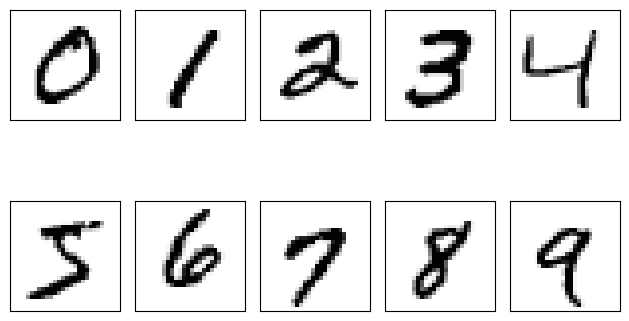

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,
                       ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- **Plot example of the same digit to see how different the handwriting for each really is:**

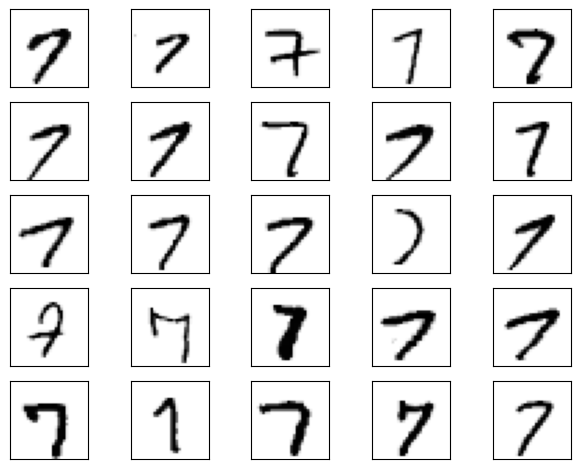

In [8]:
fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                       sharex=True,
                       sharey=True
                       )
ax = ax.flatten()
for i in range(25):
    img = X[y == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- **Split into training, validation, and test set:**

In [9]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000, random_state=123,
    stratify=y
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000,
    random_state=123, stratify=y_temp
)
# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [10]:
X_train.shape, X_valid.shape, X_test.shape

((55000, 784), (5000, 784), (10000, 784))

### **Implementing a multi-layer perceptron**

- Implememt a MLP from scratch to classify the images in the `MNIST` dataset.
- MLP with only one hidden layer.

In [11]:
import numpy as np

##########################
### MODEL
##########################

def sigmoid(z):
    return 1. / (1. + np.exp(-z))


def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary


class NeuralNetMLP:
    
    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features)
        )
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden)
        )
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T 
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out
    
    def backward(self, x, a_h, a_out, y):
        
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)
        
        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        
        
        
        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

- The `backward` method implements the so-called `backpropagation algorithm`, which calculates the gradients of the loss with respect to the weight and bias parameters. Similar to Adaline, these gradients are then used to update these parameters via gradient descent.

- Looking at this code implementation of the `NeuralNetMLP` class, you may have noticed that this object-oriented implementation differs from the familiar scikit-learn API that is centered around the `.fit()` and `.predict()` methods. 

- The main methods of the `NeuralNetMLP` class are the `.forward()` and `.backward()` methods. One of the reasons behind this is that it makes a complex neural network a bit easier to understand in terms of how the information flows through the networks.

In [12]:
# Instantiate a new `NeuralNetMLP` object:
model = NeuralNetMLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

In [13]:
model.weight_h.shape, model.bias_h.shape

((50, 784), (50,))

- The model accepts `MNIST` images reshaped into `784-dimensional` vectors (in the format of `X_train`, `X_valid`, or `X_test`, which we defined previously) for the 10 integer classes (digits 0-9). The hidden layer consists of 50 nodes.

- Also, as you may be able to tell from looking at the previously defined `.forward()` method, we use a sigmoid activation function after the first hidden layer and output layer to keep things simple.


![NN Architecture](./figures/NN-Architecture.png)

### **Coding the neural network training loop**

- Defining data loaders:
  - mini-batch generator
  - takes dataset and divides it into mini-batches of a desired size for stochastic gradient descent training

In [14]:
import numpy as np

num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        
        yield X[batch_idx], y[batch_idx]

# Iterate over training epochs
for i in range(num_epochs):
    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size
    )
    for X_train_mini, y_train_mini in minibatch_gen:
        break
    break

print(X_train_mini.shape)

(100, 784)


In [15]:
print(y_train_mini.shape)

(100,)


- **Defining a function to compute the loss and accuracy**

In [16]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets) 

- **Let’s test the preceding function and compute the initial validation set MSE and accuracy of the model we instantiated in the previous section:**

In [17]:
_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)
print(f'Initial validation MSE: {mse:.1f}')


predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 9.4%


- note that `model.forward()` returns the hidden and output layer activations. Remember that we have 10 output nodes (one corresponding to each unique class label). Hence, when computing the MSE, we first converted the class labels into one-hot encoded class labels in the `mse_loss()` function. In practice, it does not make a difference whether we average over the row or the columns of the squared-difference matrix first, so we simply call `np.mean()` without any axis
specification so that it returns a scalar.


- The output layer activations, since we used the logistic sigmoid function, are values in the range `[0, 1]`. For each input, the output layer produces 10 values in the range `[0, 1]`, so we used the `np.argmax()` function to select the index position of the largest value, which yields the predicted class label. We then compared the true labels with the predicted class labels to compute the accuracy via the accuracy() function we defined. As we can see from the preceding output, the accuracy is not very high. However, given that we have a balanced dataset with 10 classes, a prediction accuracy of approximately `10
percent` is what we would expect for an untrained model producing random predictions.

- Using the previous code, we can compute the performance on, for example, the whole training set if we provide `y_train` as input to targets and the predicted labels from feeding the model with `X_train`. However, in practice, our computer memory is usually a limiting factor for how much data the model can ingest in one forward pass (due to the large matrix multiplications). Hence, we are defining our `MSE` and `accuracy` computation based on our previous mini-batch generator. The following function will compute the `MSE` and `accuracy` incrementally by iterating over the dataset one mini-batch at a time to be more memory-efficient:

In [18]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
        
    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

- Before we implement the training loop, let’s test the function and compute the initial training set MSE and accuracy of the model we instantiated in the previous section and make sure it works as intended:

In [19]:
mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

Initial valid MSE: 0.3
Initial valid accuracy: 9.4%


- Let’s now get to the main part and implement the code to train our model:

In [20]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
        
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

- On a high level, the `train()` function iterates over multiple epochs, and in each epoch, it used the previously defined `minibatch_generator()` function to iterate over the whole training set in mini-batches for stochastic gradient descent training. 

- Inside the mini-batch generator for loop, we obtain the outputs from the model, `a_h` and `a_out`, via its `.forward()` method. Then, we compute the loss gradients via the model’s `.backward()` method.

- Using the loss gradients, we update the weights by adding the negative gradient multiplied by the learning rate.

- for example, to update the model weights of the hidden layer, we defined the following line:
    ```py
    model.weight_h -= learning_rate * d_loss__d_w_h
    ```

- Let’s now execute this function to train our model for 50 epochs, which may take a few minutes to finish:

In [21]:
np.random.seed(123) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.05 | Train Acc: 76.15% | Valid Acc: 75.98%
Epoch: 002/050 | Train MSE: 0.03 | Train Acc: 85.45% | Valid Acc: 85.04%
Epoch: 003/050 | Train MSE: 0.02 | Train Acc: 87.82% | Valid Acc: 87.60%
Epoch: 004/050 | Train MSE: 0.02 | Train Acc: 89.36% | Valid Acc: 89.28%
Epoch: 005/050 | Train MSE: 0.02 | Train Acc: 90.21% | Valid Acc: 90.04%
Epoch: 006/050 | Train MSE: 0.02 | Train Acc: 90.67% | Valid Acc: 90.54%
Epoch: 007/050 | Train MSE: 0.02 | Train Acc: 91.12% | Valid Acc: 90.82%
Epoch: 008/050 | Train MSE: 0.02 | Train Acc: 91.43% | Valid Acc: 91.26%
Epoch: 009/050 | Train MSE: 0.01 | Train Acc: 91.84% | Valid Acc: 91.50%
Epoch: 010/050 | Train MSE: 0.01 | Train Acc: 92.04% | Valid Acc: 91.84%
Epoch: 011/050 | Train MSE: 0.01 | Train Acc: 92.30% | Valid Acc: 92.08%
Epoch: 012/050 | Train MSE: 0.01 | Train Acc: 92.51% | Valid Acc: 92.24%
Epoch: 013/050 | Train MSE: 0.01 | Train Acc: 92.65% | Valid Acc: 92.30%
Epoch: 014/050 | Train MSE: 0.01 | Train Acc: 92.80

- In general, training (deep) NNs is relatively expensive compared with the other models we’ve discussed so far. Thus, we want to stop it early in certain circumstances and start over with different hyperparameter settings. On the other hand, if we find that it increasingly tends to overfit the training data (noticeable by an increasing gap between training and validation dataset performance), we may want to stop the training early, as well.

### **Evaluating the neural network performance**

- Let's look at the performance of the model that we trained in the previous subsection.
- Let's look at the training MSE loss first:

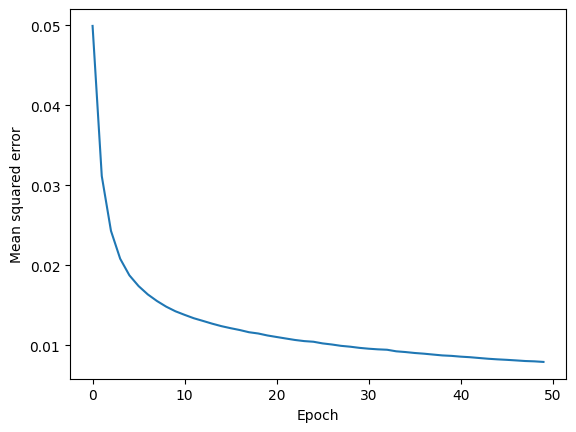

In [22]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
plt.show()

- The loss decreased substantially during the first `10` epochs and seems to slowly converge in the last `10` epochs. 
- With additional epochs, the loss would further decrease.

- **Training and validation accuracy**

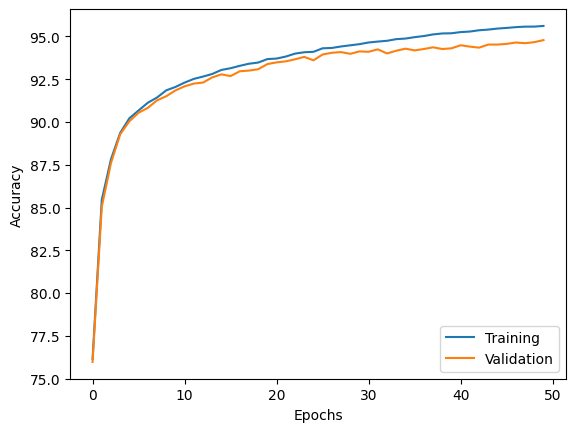

In [23]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

- The plot reveals that the gap between training and validation accuracy increases as we train for more epochs.

- Let's evalusate the generalization performance of the model by calculating the prediction accuracy on the test dataset:

In [24]:
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 94.54%


- The test accuracy is very close to the validation set accuracy.
- To further fine-tune the model, we could change the number of hidden units, the learning rate, or use various other tricks.


**Other performance-enhancing tricks, such as;**
- Adaptive learning rates
- Sophisticated SGD-based optimization algorithms
- batch normalization
- dropout
- Adding skip-connections
- Using learning rate schedulers that change the learning rate during training
- Attaching loss functions to earlier layers in the networks.

**Plot failure cases:**

- Lastly, let’s take a look at some of the images that our MLP struggles with by extracting and plotting the first 25 misclassified samples from the test set:

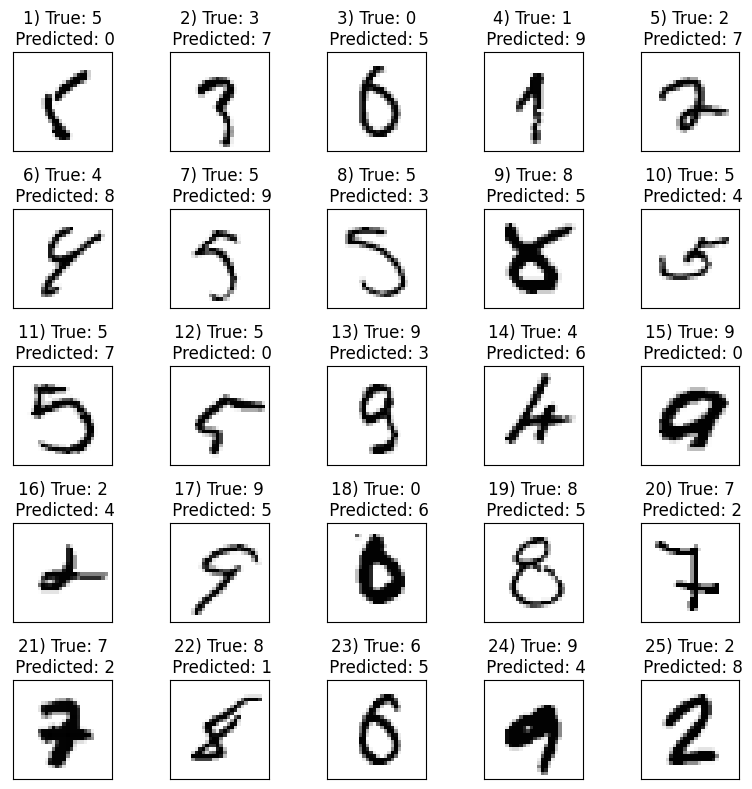

In [27]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, 
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()

- As we can see, among others, the network finds `7s` challenging when they include a horizontal line as in examples `20` and `21`. 

---

## **Training an artificial neural network**

- Let's gain a basic understanding of how `NN` works by looking over the code, to dig a little bit deeper into some of the concepts, such as the loss computation and the backpropagation algorithm that we implemented to learn the model parameters.

### **Computing the loss function**

![three-dimensional-tensor](./figures/3-dimensional-tensor.png)


### **Developing your intuition for backpropagation**

- In essence, we can think of backpropagation as a very computationally efficient approach to compute the partial derivatives of a complex, non-convex loss function in multilayer `NNs`. Here, our goal is to use those derivatives to learn the weight coefficients for parameterizing such a multilayer artificial `NN`. The challenge in the parameterization of `NNs` is that we are typically dealing with a very large number of model parameters in a high-dimensional feature space.

- In contrast to loss functions of single-layer NNs such as Adaline or logistic regression, the error surface of an NN loss function is not convex or smooth with respect to the parameters. There are many bumps in this high-dimensional loss surface (local minima) that we have to overcome in order to find the global minimum of the loss function.

- Automatic differentiation comes with two modes, the forward and reverse modes; `backpropagation` is simply a special case of reverse-mode automatic differentiation. The key point is that applying the chain rule in forward mode could be quite expensive since we would have to multiply large matrices for each layer (Jacobians) that we would eventually multiply by a vector to obtain the output.

- The trick of reverse mode is that we traverse the chain rule from right to left. We multiply a matrix by a vector, which yields another vector that is multiplied by the next matrix, and so on. Matrix-vector multiplication is computationally much cheaper than matrix-matrix multiplication, which is why `backpropagation` is one of the most popular algorithms used in `NN` training.

### **Training neural networks via backpropagation**

![Forward Propagation](./figures/forward-propagation.png)

- forward-propagating the input features of an NN

![Back Propagation](./figures/back-propagation.png)
- Back Propagating the error of an NN

![Partial Derivatives of the loss with respect to the first hidden layer weight](./figures/partial-derivative-hidden-layer.png)

- Computing the partial derivatives of the loss with respect to the first hidden layer weight.

---

## **About convergence in neural networks**

- You might be wondering why we did not use regular gradient descent but instead used mini-batch learning to train our NN for the handwritten digit classification earlier. You may recall our discussion on SGD that we used to implement online learning. In online learning, we compute the gradient based on a single training example `(k = 1)` at a time to perform the weight update. Although this is a stochastic
approach, it often leads to very accurate solutions with a much faster convergence than regular gradient descent. Mini-batch learning is a special form of SGD where we compute the gradient based on a subset `k` of the `n` training examples with `1 < k < n`. Mini-batch learning has an advantage over online learning in that we can make use of our vectorized implementations to improve computational efficiency. However, we can update the weights much faster than in regular gradient descent. Intuitively, you can think of mini-batch learning as predicting the voter turnout of a presidential election from a poll by asking only a representative subset of the population rather than asking the entire population (which would be equal to running the actual election).



- Multilayer NNs are much harder to train than simpler algorithms such as Adaline, logistic regression, or support vector machines. In multilayer NNs, we typically have hundreds, thousands, or even billions of weights that we need to optimize. Unfortunately, the output function has a rough surface, and the optimization algorithm can easily become trapped in local minima,


![Optimization trapped in local minima](./figures/local-minima.png)

- Note that this representation is extremely simplified since our NN has many dimensions; it makes it impossible to visualize the actual loss surface for the human eye. Here, we only show the loss surface for a single weight on the x axis. However, the main message is that we do not want our algorithm to get trapped in local minima. By increasing the learning rate, we can more readily escape such local minima. On the other hand, we also increase the chance of overshooting the global optimum if the learning rate is too large.